In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [290]:
df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\AdultIncome.csv")
print(df.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [291]:
df.columns = df.columns.str.strip()

In [292]:
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [293]:
for col in ['workclass', 'occupation', 'native.country']:
   df[col]= df[col].fillna(df[col].mode()[0])
print(df.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90   Private   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66   Private  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0     Prof-specialty  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2     Prof-specialty      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [294]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

In [295]:
df.duplicated().sum()

np.int64(24)

In [296]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [297]:
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       41
income                2
dtype: int64

In [298]:
df.drop(['fnlwgt','capital.gain','capital.loss'], axis=1, inplace=True)

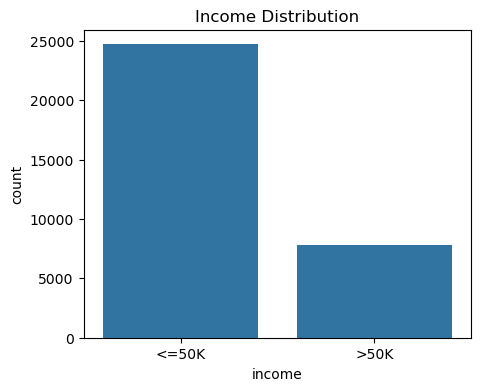

In [299]:
plt.figure(figsize=(5,4))
sns.countplot(x='income', data=df)
plt.title('Income Distribution')
plt.show()

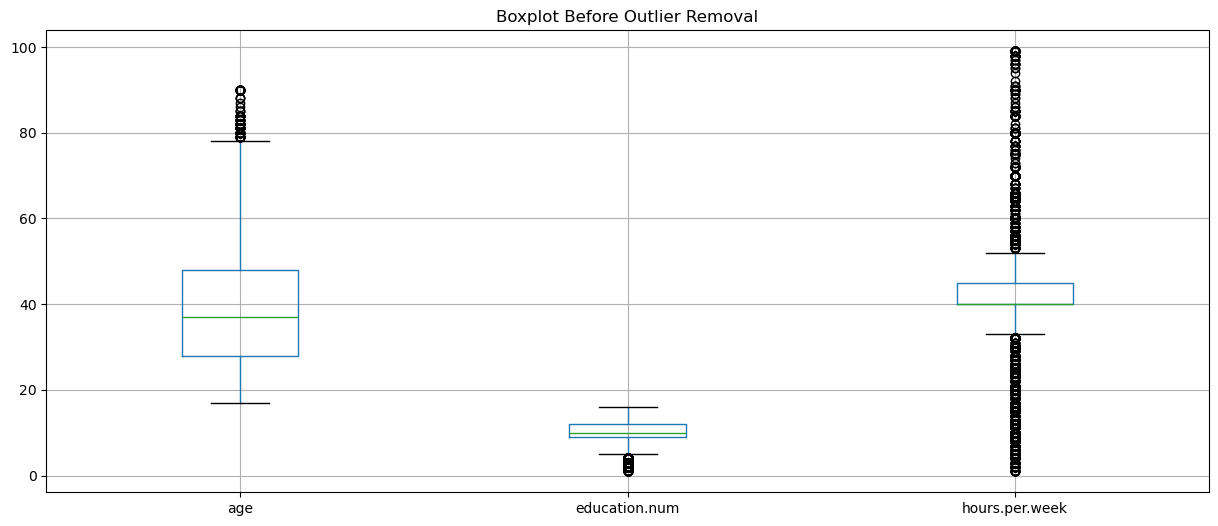

In [300]:
num_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 6))
df[num_cols].boxplot()
plt.title("Boxplot Before Outlier Removal")
plt.show()

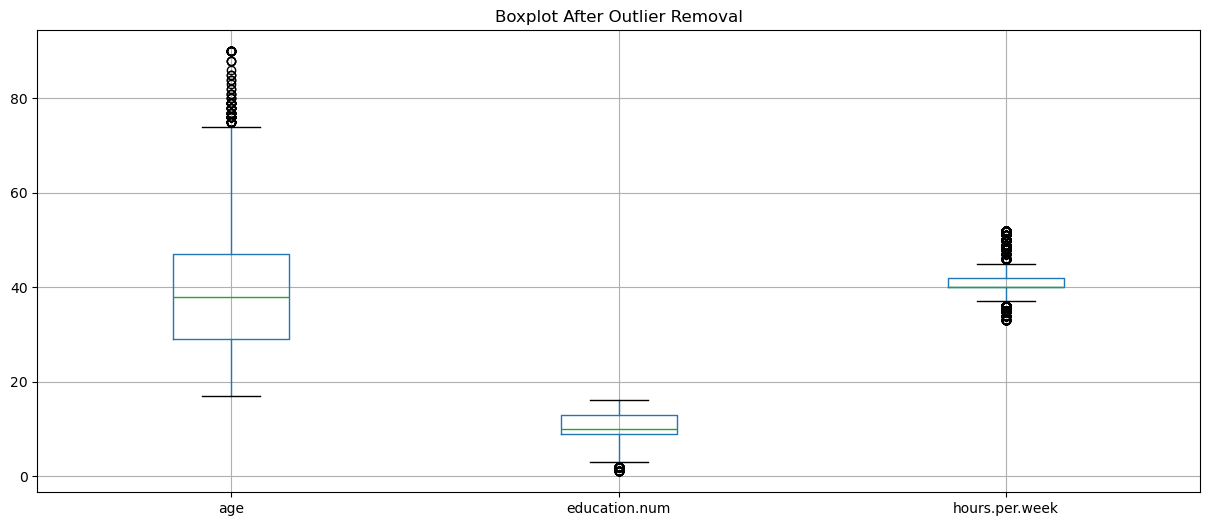

In [301]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

df = df[(df[col] >= lower) & (df[col] <= upper)]

plt.figure(figsize=(15, 6))
df[num_cols].boxplot()
plt.title("Boxplot After Outlier Removal")
plt.show()


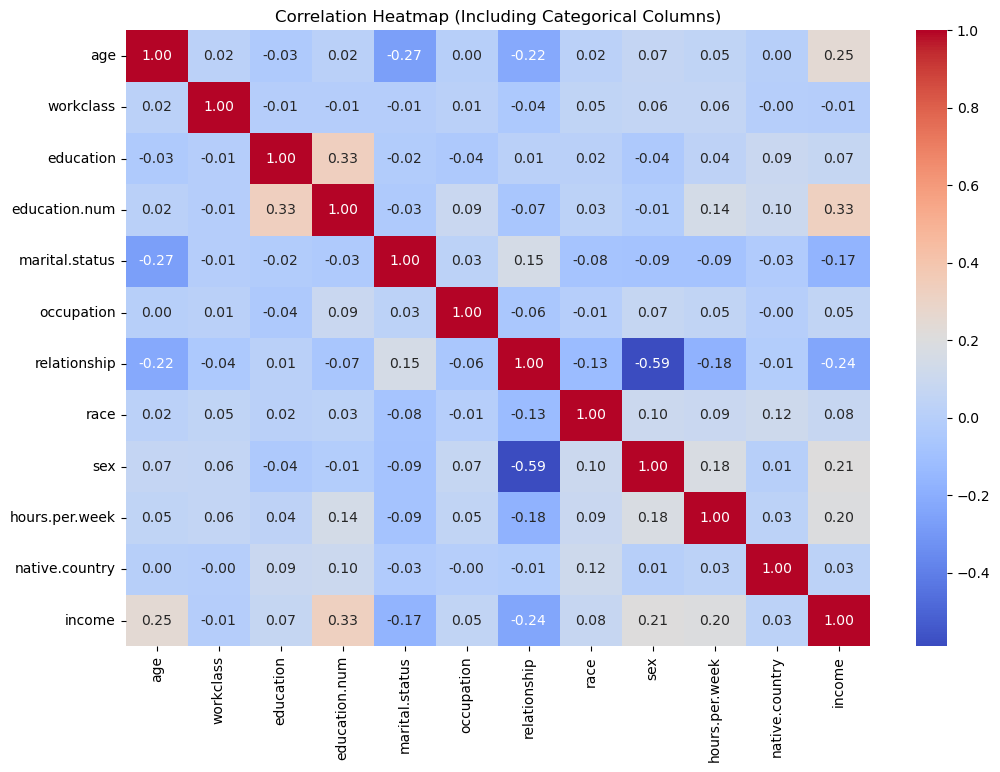

In [302]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Including Categorical Columns)')
plt.show()

In [303]:
X = df_encoded.drop('income', axis=1)
y = df['income']

In [304]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [305]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [306]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [307]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [308]:
for name, model in models.items():
    print(f"{name}")
    
    if name in ["Logistic Regression", "KNN"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression
Accuracy: 0.7939
Confusion Matrix:
 [[3228  285]
 [ 685  509]]
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.82      0.92      0.87      3513
        >50K       0.64      0.43      0.51      1194

    accuracy                           0.79      4707
   macro avg       0.73      0.67      0.69      4707
weighted avg       0.78      0.79      0.78      4707

KNN
Accuracy: 0.8018
Confusion Matrix:
 [[3105  408]
 [ 525  669]]
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.86      0.88      0.87      3513
        >50K       0.62      0.56      0.59      1194

    accuracy                           0.80      4707
   macro avg       0.74      0.72      0.73      4707
weighted avg       0.80      0.80      0.80      4707

Decision Tree
Accuracy: 0.7684
Confusion Matrix:
 [[2995  518]
 [ 572  622]]
Classification Report:
               precision    recall  f1-score   s

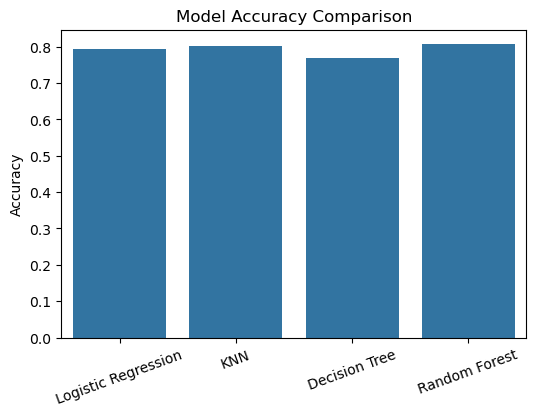

In [309]:
plt.figure(figsize=(6,4))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=20)
plt.show()